# 표본 추출

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

## 비복원 추출

In [3]:
import random
li = [10,20,30,40,50]
#복원 추출
for i in range(5):
    print(li[random.randint(0, len(li)-1)], end=' ')
print()
#비복원 추출
print(random.sample(li, k=5))

40 20 20 50 20 
[40, 50, 10, 30, 20]


         income  type
43286   96500.0  Data
47007   32500.0  Data
20584   49975.0  Data
17650  130000.0  Data
32049   44000.0  Data


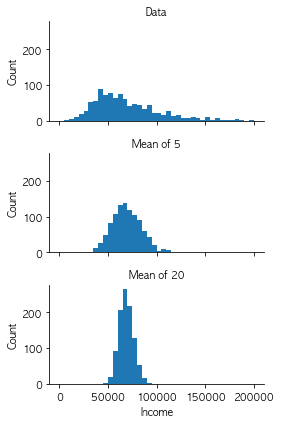

In [4]:
from sklearn.utils import resample
loans_income = pd.read_csv('./data/loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [5]:
# 가중치를 고려한 추출
arr = ['Hello', 'Hi', 'Good', 'Nice']
print(np.random.choice(arr, 5, p=[0.5, 0.1, 0.1, 0.3]))

['Hello' 'Nice' 'Hello' 'Good' 'Nice']


In [6]:
ex_df=pd.DataFrame(np.arange(0,12).reshape(4,3))
print(ex_df)
print()

# 랜덤 샘플 추출 예제
print(ex_df.sample())
print()

print(ex_df.sample(n=3))

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

   0  1  2
1  3  4  5

   0   1   2
0  0   1   2
1  3   4   5
3  9  10  11


In [7]:
# weights 입력변수의 사용
print(ex_df.sample(n=3, replace=True, weights=[0.7,0.2,0.1,0]))
print()
#열 샘플링
print(ex_df.sample(n=2, axis=1))

   0  1  2
0  0  1  2
1  3  4  5
2  6  7  8

   0   2
0  0   2
1  3   5
2  6   8
3  9  11


In [8]:
X = np.arange(20).reshape(10, 2)
print(X)
print()
y = np.arange(10)
print(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]

[0 1 2 3 4 5 6 7 8 9]


## 순차적 분할

In [9]:
from sklearn.model_selection import train_test_split
# shuffle = False
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    shuffle=False, 
                                                    random_state=1004)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print()
print(X_train)
print()
print(y_train)

X_train shape: (6, 2)
X_test shape: (4, 2)
y_train shape: (6,)
y_test shape: (4,)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]

[0 1 2 3 4 5]


## 무작위 분할

In [10]:
# shuffle = True
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    shuffle=True, 
                                                    random_state=1004)
print(X_train)
print()
print(y_train)

[[ 2  3]
 [ 8  9]
 [ 6  7]
 [14 15]
 [10 11]
 [ 4  5]]

[1 4 3 7 5 2]


## 층화 무작위 추출

In [11]:
X = np.arange(30).reshape(15, 2)
print(X)
print()

y = np.arange(15)
print(y)
print()

# stratum (group)
grp = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(grp)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    stratify=grp, 
                                                    random_state=1004)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (12, 2)
X_test shape: (3, 2)
y_train shape: (12,)
y_test shape: (3,)
[[12 13]
 [ 8  9]
 [28 29]
 [ 0  1]
 [10 11]
 [ 6  7]
 [ 2  3]
 [18 19]
 [20 21]
 [22 23]
 [26 27]
 [14 15]]

[ 6  4 14  0  5  3  1  9 10 11 13  7]

[[16 17]
 [ 4  5]
 [24 25]]

[ 8  2 12]


In [14]:
print(X_train)
print()
print(y_train)
print()
print(X_test)
print()
print(y_test)

[[12 13]
 [ 8  9]
 [28 29]
 [ 0  1]
 [10 11]
 [ 6  7]
 [ 2  3]
 [18 19]
 [20 21]
 [22 23]
 [26 27]
 [14 15]]

[ 6  4 14  0  5  3  1  9 10 11 13  7]

[[16 17]
 [ 4  5]
 [24 25]]

[ 8  2 12]


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)
for train_idx, test_idx in split.split(X, grp):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
print(X_train)
print()
print(y_train)
print()
print(X_test)
print()
print(y_test)

[[12 13]
 [ 8  9]
 [28 29]
 [ 0  1]
 [10 11]
 [ 6  7]
 [ 2  3]
 [18 19]
 [20 21]
 [22 23]
 [26 27]
 [14 15]]

[ 6  4 14  0  5  3  1  9 10 11 13  7]

[[16 17]
 [ 4  5]
 [24 25]]

[ 8  2 12]


In [16]:
X = np.arange(30).reshape(15, 2)
y = np.arange(15)

df = pd.DataFrame(np.column_stack((X, y)), columns=['X1','X2', 'y'])
print(df)


    X1  X2   y
0    0   1   0
1    2   3   1
2    4   5   2
3    6   7   3
4    8   9   4
5   10  11   5
6   12  13   6
7   14  15   7
8   16  17   8
9   18  19   9
10  20  21  10
11  22  23  11
12  24  25  12
13  26  27  13
14  28  29  14


In [17]:
df['grp'] = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(df)

    X1  X2   y  grp
0    0   1   0    0
1    2   3   1    0
2    4   5   2    0
3    6   7   3    0
4    8   9   4    0
5   10  11   5    1
6   12  13   6    1
7   14  15   7    1
8   16  17   8    1
9   18  19   9    1
10  20  21  10    1
11  22  23  11    1
12  24  25  12    1
13  26  27  13    1
14  28  29  14    1


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)
for train_idx, test_idx in split.split(df, df["grp"]):
    df_strat_train = df.loc[train_idx]
    df_strat_test = df.loc[test_idx]
print(df_strat_train)
print()
print(df_strat_test)

    X1  X2   y  grp
6   12  13   6    1
4    8   9   4    0
14  28  29  14    1
0    0   1   0    0
5   10  11   5    1
3    6   7   3    0
1    2   3   1    0
9   18  19   9    1
10  20  21  10    1
11  22  23  11    1
13  26  27  13    1
7   14  15   7    1

    X1  X2   y  grp
8   16  17   8    1
2    4   5   2    0
12  24  25  12    1


In [19]:
print(df["grp"].value_counts() / len(df))
print()
print(df_strat_train["grp"].value_counts() / len(df_strat_train))
print()
print(df_strat_test["grp"].value_counts() / len(df_strat_test))

1    0.667
0    0.333
Name: grp, dtype: float64

1    0.667
0    0.333
Name: grp, dtype: float64

1    0.667
0    0.333
Name: grp, dtype: float64


## 재표본 추출

### 부트스트랩

In [20]:
np.random.seed(104)

df = pd.read_csv('./data/coffee_dataset.csv')
print(df.head())
df.info()

   user_id   age  drinks_coffee  height
0     4509   <21          False  64.538
1     1864  >=21           True  65.824
2     2060   <21          False  71.320
3     7875  >=21           True  68.569
4     6254   <21           True  64.020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB
None


In [21]:
df_sample = df.sample(200)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 486 to 914
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB
None


In [22]:
#커피를 마시는 사람과 그렇지 않은 사람의 키 평균 차이
iterationNum = 10000
diffHeightList = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMean = bootSample[bootSample['drinks_coffee'] == False].height.mean() # 커피를 마시지 않는 사람 평균 키
    coffeeHeightMean = bootSample[bootSample['drinks_coffee'] == True].height.mean() # 커피를 마시는 사람 평균 키
    diff = nonCoffeeHeightMean - coffeeHeightMean
    diffHeightList.append(diff)
#  신뢰수준 99.5%인 평균 키 차이에 대한 신뢰구간
print(np.percentile(diffHeightList, 0.5), np.percentile(diffHeightList, 99.5))

-3.1319975931075725 -0.7811253958264726


In [23]:
#21세 이상의 사람과 21세 미만의 키 평균 차이
diffHeightListByAge = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    over21HeightMean = bootSample[bootSample['age'] == '>=21'].height.mean() # 21살 이상 평균 키
    under21HeightMean = bootSample[bootSample['age'] == '<21'].height.mean() # 21살 미만 평균 키
    diff = over21HeightMean - under21HeightMean
    diffHeightListByAge.append(diff)

np.percentile(diffHeightListByAge, 0.5), np.percentile(diffHeightListByAge, 99.5)

(3.094910696764073, 4.97970620735041)

In [24]:
#21살 미만인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
diffHeightListUnder21 = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMeanUnder21 = bootSample.query("age == '<21' and drinks_coffee == False").height.mean() # 21살 미만이며 커피를 마시지 않는 사람 평균 키
    coffeeHeightMeanUnder21 = bootSample.query("age == '<21' and drinks_coffee == True").height.mean() # 21살 미만이며 커피를 마시는 사람 평균 키
    diff = nonCoffeeHeightMeanUnder21 - coffeeHeightMeanUnder21
    diffHeightListUnder21.append(diff)

np.percentile(diffHeightListUnder21, 0.5), np.percentile(diffHeightListUnder21, 99.5)

(0.2654451155424802, 2.473977523788757)

In [25]:
#21살 이상인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
diffHeightListOver21 = []
for _ in range(iterationNum):
    bootSample = df_sample.sample(200, replace=True) # 복원 추출
    nonCoffeeHeightMeanOver21 = bootSample.query("age != '<21' and drinks_coffee == False").height.mean() # 21살 이상이며 커피를 마시지 않는 사람 평균 키
    coffeeHeightMeanOver21 = bootSample.query("age != '<21' and drinks_coffee == True").height.mean() # 21살 이상이며 커피를 마시는 사람 평균 키

    diff = nonCoffeeHeightMeanOver21 - coffeeHeightMeanOver21
    diffHeightListOver21.append(diff)

np.percentile(diffHeightListOver21, 0.5), np.percentile(diffHeightListOver21, 99.5)


(nan, nan)

In [26]:
# 1. 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
print(df[df['drinks_coffee'] == False].height.mean() - df[df['drinks_coffee'] == True].height.mean())
# 2. 21살 이상과 21살 미만인 사람들의 평균 키 차이
print(df[df['age'] == '>=21'].height.mean() - df[df['age'] == '<21'].height.mean())
# 3. 21살 미만인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
print(df.query("age == '<21' and drinks_coffee == False").height.mean() - df.query("age == '<21' and drinks_coffee == True").height.mean())
# 4. 21살 이상인 사람들 중 커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이
print(df.query("age != '<21' and drinks_coffee == False").height.mean() - df.query("age != '<21' and drinks_coffee == True").height.mean())


-1.9568024933369799
3.88229124992111
1.6993900935511732
1.9509354889786579


In [28]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -60.12550000000192
std. error: 192.02552252513416
